# Build Feed Forward Net from Scratch

Define a class for a feedforward neural net to to apply to the MNIST dataset to classifying the images. This method uses a sigmoid activation function.


In [ ]:
# our handy dandy libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import mnist
from sklearn.preprocessing import LabelBinarizer
from sklearn import datasets

In [ ]:
  # used to hold plot data
  # I made them global so that I didn't have to pass more into the class
  plot_data1 = {}
  plot_data2 = {}
  
  ### FEED FORWARD NET WITH SIGMOID ACTIVATION
  class FeedforwardNeuralNetwork:
    # input a vector [a, b, c, ...] with the number of nodes in each layer
    # alpha is the learning rate
    def __init__(self, layers, testY, testX, alpha = 0.1):
        # list of weight matrices between layers
        self.W = []
        
        # network architecture will be a vector of numbers of nodes for each layer
        self.layers = layers
        
        # learning rate
        self.alpha = alpha
        
        # testX and testY
        self.textX = testX
        self.testY = testY

        # initialize the weights (randomly) -- this is our initial guess for gradient descent
        
        # initialize the weights between layers (up to the next-to-last one) as normal random variables
        for i in np.arange(0, len(layers) - 2):
            self.W.append(np.random.randn(layers[i] + 1, layers[i + 1] + 1))
            
        # initialize weights between the last two layers (we don't want bias for the last one)
        self.W.append(np.random.randn(layers[-2] + 1, layers[-1]))
        
    # define the sigmoid activation
    def sigmoid(self, x):
        #print(x)
        return 1.0 / (1 + np.exp(-x))
    
    # define the sigmoid derivative (where z is the output of a sigmoid)
    def sigmoidDerivative(self, z):
        #print(z)
        return z * (1 - z)
    
    # fit the model
    def fit(self, X, y, testY, testX, epochs = 10000, update = 1000):
        # add a column of ones to the end of X
        X = np.hstack((X, np.ones([X.shape[0],1])))

        for epoch in np.arange(0,epochs):

            # feed forward, backprop, and weight update
            for (x, target) in zip(X, y):
                # make a list of output activations from the first layer
                # (just the original x values)
                A = [np.atleast_2d(x)]
                
                # feed forward
                for layer in np.arange(0, len(self.W)):
                    
                    # feed through one layer and apply sigmoid activation
                    net = A[layer].dot(self.W[layer])
                    out = self.sigmoid(net)
                    
                    # add our network output to the list of activations
                    A.append(out)
                    
                # backpropagation
                error = A[-1] - target
                
                D = [error * self.sigmoidDerivative(A[-1])]
                
                # loop backwards over the layers to build up deltas
                for layer in np.arange(len(A) - 2, 0, -1):
                    delta = D[-1].dot(self.W[layer].T)
                    delta = delta * self.sigmoidDerivative(A[layer])
                    D.append(delta)
                    
                # reverse the deltas since we looped in reverse
                D = D[::-1]
                
                # weight update
                for layer in np.arange(0, len(self.W)):
                    self.W[layer] -= self.alpha * A[layer].T.dot(D[layer])
                    
            if (epoch + 1) % update == 0:
                loss = self.computeLoss(X,y)

                predictedY = model.predict(testX)
                predictedY = predictedY.argmax(axis=1)
                accuracy = accuracy_score(testY, predictedY)

                print("[INFO] epoch = {}, loss = {:.6f}, accuracy = {:.6f}".format(epoch + 1, loss, accuracy))
                plot_data1[epoch+1] = loss
                plot_data2[epoch+1] = accuracy
                
    def predict(self, X, addOnes = True):
        # initialize data, be sure it's the right dimension
        p = np.atleast_2d(X)
        
        # add a column of 1s for bias
        if addOnes:
            p = np.hstack((p, np.ones([X.shape[0],1])))
        
        # feed forward!
        for layer in np.arange(0, len(self.W)):
            p = self.sigmoid(np.dot(p, self.W[layer]))
            
        return p
    
    def computeLoss(self, X, y):
        # initialize data, be sure it's the right dimension
        y = np.atleast_2d(y)
        
        # feed the datapoints through the network to get predicted outputs
        predictions = self.predict(X, addOnes = False)
        loss = np.sum((predictions - y)**2) / 2.0
        
        return loss

# Classifying MNIST
Import the MNIST data and run the model on it using 5000 datapoints. We compute the testing acccuracy at each training epoch and generate two plots:   

1.   Training epoch number vs.  loss
2.   Training epoch number vs.classification accuracy.

Origianlly I used 1000 epochs but after looking at the plots I could see that little imporvement was made after ~500 epochs so I adjusted it to save time.Also note that the training accuracy is much higher than the testing accuracy, 0.97 versus 0.86. This indicates that the model is overfitting to the training data. In the next problem we begin to address this with L2 regularlization. 

layers:  [784, 16, 10]
[INFO] epoch = 10, loss = 455.631226, accuracy = 0.785600
[INFO] epoch = 20, loss = 292.281965, accuracy = 0.828000
[INFO] epoch = 30, loss = 231.081359, accuracy = 0.841600
[INFO] epoch = 40, loss = 192.675242, accuracy = 0.848800
[INFO] epoch = 50, loss = 164.624656, accuracy = 0.853600
[INFO] epoch = 60, loss = 147.818965, accuracy = 0.852000
[INFO] epoch = 70, loss = 134.266474, accuracy = 0.848800
[INFO] epoch = 80, loss = 125.312166, accuracy = 0.849600
[INFO] epoch = 90, loss = 118.771482, accuracy = 0.848800
[INFO] epoch = 100, loss = 113.525330, accuracy = 0.848800
[INFO] epoch = 110, loss = 107.651218, accuracy = 0.848000
[INFO] epoch = 120, loss = 102.489880, accuracy = 0.846400
[INFO] epoch = 130, loss = 98.213803, accuracy = 0.845600
[INFO] epoch = 140, loss = 94.586621, accuracy = 0.843200
[INFO] epoch = 150, loss = 91.653577, accuracy = 0.843200
[INFO] epoch = 160, loss = 89.080970, accuracy = 0.844000
[INFO] epoch = 170, loss = 86.869693, accuracy

<function matplotlib.pyplot.show>

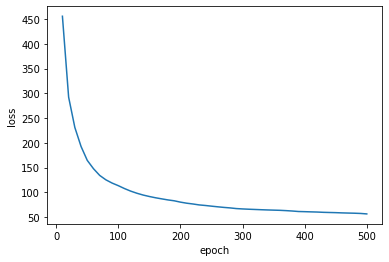

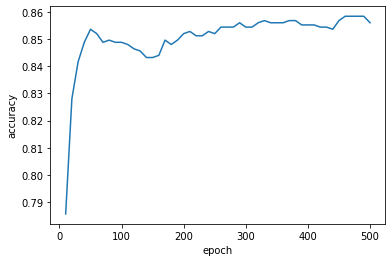

In [ ]:
### CLASIFY MNIST PICTURES

# load the MNIST data
mnistData = mnist.load_data()

# The datapoints are in mnistData[0][0]
X = mnistData[0][0][:5000].reshape([5000,28*28])
X = X/225.0

# The labels are in mnistData[0][1]
Y = mnistData[0][1][:5000]

# randomly choose 75% of the data to be the training set and 25% for the testing set
(trainX, testX, trainY, testY) = train_test_split(X, Y, test_size = 0.25)

trainY = LabelBinarizer().fit_transform(trainY)
#testY = LabelBinarizer().fit_transform(testY)

# fit the model to the training data
# more than one hidden layer does not significantly increase accuracy
model = FeedforwardNeuralNetwork([784, 16, 10],testY,testX,  0.1)

# 500 epochs, prints updates every 10
model.fit(trainX,trainY, testY, testX, 500,10)    

# print the classification performance
print("Training set accuracy")
predictedY = model.predict(trainX)
predictedY = predictedY.argmax(axis=1)

trainY = trainY.argmax(axis=1)
print(classification_report(trainY, predictedY))

print("Test set accuracy")
predictedY = model.predict(testX)
predictedY = predictedY.argmax(axis=1)

#testY = testY.argmax(axis=1)
print(classification_report(testY, predictedY))

# create plots of epoch vs loss and epoch vs accuracy
plot1 = plt.figure(1)
plt.plot(list(plot_data1.keys()), list(plot_data1.values()))
plt.ylabel("loss")
plt.xlabel("epoch")

plot2 = plt.figure(2)
plt.plot(list(plot_data2.keys()), list(plot_data2.values()))
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.show

# Adding Regularization
In hopes of boosting accuracy, we add L2 regularization to the feedforward neural net class. This introduces the regularization parameter, lmbda which is used in the computeLoss function. 



In [ ]:
  # used to hold plot data
  # I made them global so that I didn't have to pass more into the class
  plot_data1 = {}
  plot_data2 = {}
  
  ### FEED FORWARD NET WITH SIGMOID ACTIVATION
  class FeedforwardNeuralNetworkL2Penalty:
    # input a vector [a, b, c, ...] with the number of nodes in each layer
    # alpha is the learning rate
    def __init__(self, layers, testY, testX, alpha = 0.1, lmbda = 1000):
        # list of weight matrices between layers
        self.W = []
        
        # network architecture will be a vector of numbers of nodes for each layer
        self.layers = layers
        
        # learning rate
        self.alpha = alpha
        
        # testX and testY
        self.textX = testX
        self.testY = testY

        #lambda (L2 Penalty)
        self.lmbda = lmbda

        # initialize the weights (randomly) -- this is our initial guess for gradient descent
        
        # initialize the weights between layers (up to the next-to-last one) as normal random variables
        for i in np.arange(0, len(layers) - 2):
            self.W.append(np.random.randn(layers[i] + 1, layers[i + 1] + 1))
            
        # initialize weights between the last two layers (we don't want bias for the last one)
        self.W.append(np.random.randn(layers[-2] + 1, layers[-1]))
        
    # define the sigmoid activation
    def sigmoid(self, x):
        #print(x)
        return 1.0 / (1 + np.exp(-x))
    
    # define the sigmoid derivative (where z is the output of a sigmoid)
    def sigmoidDerivative(self, z):
        #print(z)
        return z * (1 - z)
    
    # fit the model
    def fit(self, X, y, testY, testX, epochs = 10000, update = 1000):
        # add a column of ones to the end of X
        X = np.hstack((X, np.ones([X.shape[0],1])))

        for epoch in np.arange(0,epochs):

            # feed forward, backprop, and weight update
            for (x, target) in zip(X, y):
                # make a list of output activations from the first layer
                # (just the original x values)
                A = [np.atleast_2d(x)]
                
                # feed forward
                for layer in np.arange(0, len(self.W)):
                    
                    # feed through one layer and apply sigmoid activation
                    net = A[layer].dot(self.W[layer])
                    out = self.sigmoid(net)
                    
                    # add our network output to the list of activations
                    A.append(out)
                    
                # backpropagation
                error = A[-1] - target
                
                D = [error * self.sigmoidDerivative(A[-1])]
                
                # loop backwards over the layers to build up deltas
                for layer in np.arange(len(A) - 2, 0, -1):
                    delta = D[-1].dot(self.W[layer].T)
                    delta = delta * self.sigmoidDerivative(A[layer])
                    D.append(delta)
                    
                # reverse the deltas since we looped in reverse
                D = D[::-1]
                
                # weight update
                for layer in np.arange(0, len(self.W)):
                    self.W[layer] -= self.alpha * A[layer].T.dot(D[layer])
                    
            if (epoch + 1) % update == 0:
                loss = self.computeLoss(X,y)

                predictedY = model.predict(testX)
                predictedY = predictedY.argmax(axis=1)
                accuracy = accuracy_score(testY, predictedY)

                print("[INFO] epoch = {}, loss = {:.6f}, accuracy = {:.6f}".format(epoch + 1, loss, accuracy))
                plot_data1[epoch+1] = loss
                plot_data2[epoch+1] = accuracy
                
    def predict(self, X, addOnes = True):
        # initialize data, be sure it's the right dimension
        p = np.atleast_2d(X)
        
        # add a column of 1s for bias
        if addOnes:
            p = np.hstack((p, np.ones([X.shape[0],1])))
        
        # feed forward!
        for layer in np.arange(0, len(self.W)):
            p = self.sigmoid(np.dot(p, self.W[layer]))
            
        return p
    
    def computeLoss(self, X, y):
        # initialize data, be sure it's the right dimension
        y = np.atleast_2d(y)
        m = len(y)
        # feed the datapoints through the network to get predicted outputs
        predictions = self.predict(X, addOnes = False)

        # compute loss with the L2 penalty
        L2_penalty = 0
        for layer in np.arange(0, len(self.W)):
            L2_penalty += (self.lmbda/(2*m))*(np.sum(np.square(self.W[layer])))

        loss = (np.sum((predictions - y)**2)/2.0) + L2_penalty
                  
        return loss
        

We run the model gain on the MNIST dataset and generate the same two plots as with problem 2. Looking at the plots we can see  that the L2 regularization brings down the training accuracy (from .97 to .94) but we see a small increase in the testing accuracy (from .86 to .88). Testing determined that a small value for lmbda works best with this model and dataset.

[INFO] epoch = 10, loss = 1419.738374, accuracy = 0.433600
[INFO] epoch = 20, loss = 1214.922188, accuracy = 0.562400
[INFO] epoch = 30, loss = 1047.595326, accuracy = 0.642400
[INFO] epoch = 40, loss = 915.094861, accuracy = 0.691200
[INFO] epoch = 50, loss = 814.407691, accuracy = 0.719200
[INFO] epoch = 60, loss = 742.707935, accuracy = 0.744800
[INFO] epoch = 70, loss = 685.796820, accuracy = 0.764800
[INFO] epoch = 80, loss = 637.047716, accuracy = 0.787200
[INFO] epoch = 90, loss = 596.943388, accuracy = 0.797600
[INFO] epoch = 100, loss = 563.082222, accuracy = 0.810400
[INFO] epoch = 110, loss = 533.063530, accuracy = 0.819200
[INFO] epoch = 120, loss = 506.334399, accuracy = 0.825600
[INFO] epoch = 130, loss = 482.532962, accuracy = 0.833600
[INFO] epoch = 140, loss = 461.201702, accuracy = 0.839200
[INFO] epoch = 150, loss = 442.159941, accuracy = 0.844800
[INFO] epoch = 160, loss = 425.048775, accuracy = 0.846400
[INFO] epoch = 170, loss = 409.744206, accuracy = 0.848800
[IN

<function matplotlib.pyplot.show>

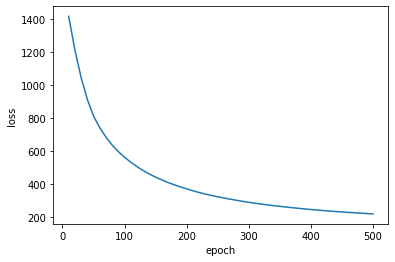

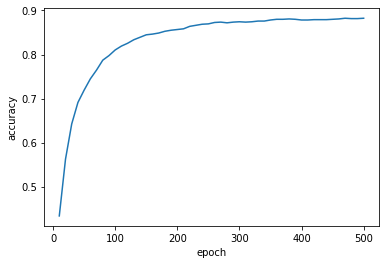

In [ ]:
### CLASIFY MNIST PICTURES

# load the MNIST data
mnistData = mnist.load_data()

# The datapoints are in mnistData[0][0]
X = mnistData[0][0][:5000].reshape([5000,28*28])
X = X/225.0

# The labels are in mnistData[0][1]
Y = mnistData[0][1][:5000]

# randomly choose 75% of the data to be the training set and 25% for the testing set
(trainX, testX, trainY, testY) = train_test_split(X, Y, test_size = 0.25)

trainY = LabelBinarizer().fit_transform(trainY)
#testY = LabelBinarizer().fit_transform(testY)

# fit the model to the training data
# more than one hidden layer does not significantly increase accuracy
model = FeedforwardNeuralNetworkL2Penalty([784, 16, 10],testY,testX, 0.005, 5)
model.fit(trainX,trainY, testY, testX, 500,10)    

# print the classification performance
print("Training set accuracy")
predictedY = model.predict(trainX)
predictedY = predictedY.argmax(axis=1)

trainY = trainY.argmax(axis=1)
print(classification_report(trainY, predictedY))

print("Test set accuracy")
predictedY = model.predict(testX)
predictedY = predictedY.argmax(axis=1)

#testY = testY.argmax(axis=1)
print(classification_report(testY, predictedY))

# create plots of epoch vs loss and epoch vs accuracy
plot1 = plt.figure(1)
plt.plot(list(plot_data1.keys()), list(plot_data1.values()))
plt.ylabel("loss")
plt.xlabel("epoch")

plot2 = plt.figure(2)
plt.plot(list(plot_data2.keys()), list(plot_data2.values()))
plt.ylabel("accuracy")
plt.xlabel("epoch")

plt.show

# Testing Activation Functions
In the previous code the feedforward neural network used a sigmoid activation function. Here we add options to choose between several activation functions:  sigmoid, rectified linear unit (ReLU), and exponential linear  unit (ELU). To chose which activation function to use, a new variable called activation is passed into the class. The variable is a string, either sigmoid, reLu, or ELU.

In [ ]:
  plot_data_sig = {}
  plot_data2_sig = {}
  plot_data_re = {}
  plot_data2_re = {}
  plot_data_elu = {}
  plot_data2_elu = {}

  ### FEED FORWARD NET WITH ACTIVATION OPTIONS AND L2 PENELTY
  class FeedforwardNeuralNetworkOptions:
    # input a vector [a, b, c, ...] with the number of nodes in each layer
    # alpha is the learning rate
    def __init__(self, layers, testY, testX, alpha = 0.1, activation = "sigmoid"):
        # list of weight matrices between layers
        self.W = []
        
        # network architecture will be a vector of numbers of nodes for each layer
        self.layers = layers
        
        # learning rate
        self.alpha = alpha
        
        #activation function to use
        self.activation = activation

        # testX and testY
        self.textX = testX
        self.testY = testY
        
        # initialize the weights between layers (up to the next-to-last one) as normal random variables
        for i in np.arange(0, len(layers) - 2):
          self.W.append(np.random.randn(layers[i] + 1, layers[i + 1] + 1)/100)
            
        # initialize weights between the last two layers (we don't want bias for the last one)
        self.W.append(np.random.randn(layers[-2] + 1, layers[-1])/100)

    def activation_function(self, x):
      # define the sigmoid activation
      if self.activation == "sigmoid":
        return 1.0 / (1 + np.exp(-x))

      # define the reLu activation  
      if self.activation == "reLu":
        return np.maximum(0, x)

      # define the ELU activation
      if self.activation == "ELU":
        a = 0.2
        return np.where(x > 0, x, a*(np.exp(x)-1))
        
    def activation_derivative(self, x):
      # define the sigmoid derivative
      if self.activation == "sigmoid":
        return x * (1 - x)
      
      # define the reLu derivative
      if self.activation == "reLu":
        return np.where(x>0, 1, 0)

      # define the ELU derivative
      a = 0.2
      if self.activation == "ELU":
        #return a*np.exp(x) if x <= 0 else 1
        return np.where(x > 0, 1, a*np.exp(x))

    
    # fit the model
    def fit(self, X, y, testY, testX, epochs = 10000, update = 1000):
        # add a column of ones to the end of X
        X = np.hstack((X, np.ones([X.shape[0],1])))

        for epoch in np.arange(0,epochs):

            # feed forward, backprop, and weight update
            for (x, target) in zip(X, y):
                # make a list of output activations from the first layer
                # (just the original x values)
                A = [np.atleast_2d(x)]
                Z = [np.atleast_2d(x)]
                
                # feed forward
                for layer in np.arange(0, len(self.W)):
                    
                    # feed through one layer and apply activation function
                    net = A[layer].dot(self.W[layer])
                    out = np.array(self.activation_function(net))
                                  
                    # add our network output to the list of activations
                    A.append(out)
                    Z.append(net)
                    
                # backpropagation
                error = A[-1] - target
                
                # sigmoid derivative uses the activated values, relu/elu don't
                if self.activation == "sigmoid":
                  D = [error * self.activation_derivative(A[-1])]
                else:
                  D = [error * self.activation_derivative(Z[-1])]
                
                # loop backwards over the layers to build up deltas
                for layer in np.arange(len(A) - 2, 0, -1):
                    delta = D[-1].dot(self.W[layer].T)
                    if self.activation == "sigmoid":
                      delta = delta * self.activation_derivative(A[layer])
                    else:
                      delta = delta * self.activation_derivative(Z[layer])
                    D.append(delta)
                    
                # reverse the deltas since we looped in reverse
                D = D[::-1]
                
                # weight update
                for layer in np.arange(0, len(self.W)):
                    self.W[layer] -= self.alpha * A[layer].T.dot(D[layer])
                    
            if (epoch + 1) % update == 0:
                loss = self.computeLoss(X,y)
                predictedY = model.predict(testX)
                predictedY = predictedY.argmax(axis=1)
                accuracy = accuracy_score(testY, predictedY)

                print("[INFO] epoch = {}, loss = {:.6f}, accuracy = {:.6f}".format(epoch + 1, loss, accuracy))
                if self.activation == 'sigmoid':
                  plot_data_sig[epoch+1] = loss
                  plot_data2_sig[epoch+1] = accuracy
                if self.activation == 'reLu':
                  plot_data_re[epoch+1] = loss
                  plot_data2_re[epoch+1] = accuracy
                else:
                  plot_data_elu[epoch+1] = loss
                  plot_data2_elu[epoch+1] = accuracy
                
    def predict(self, X, addOnes = True):
        # initialize data, be sure it's the right dimension
        p = np.atleast_2d(X)
        
        # add a column of 1s for bias
        if addOnes:
            p = np.hstack((p, np.ones([X.shape[0],1])))
        
        # feed forward!
        for layer in np.arange(0, len(self.W)):
            p = self.activation_function(np.dot(p, self.W[layer]))
            
        return p
    
    def computeLoss(self, X, y):
        # initialize data, be sure it's the right dimension
        y = np.atleast_2d(y)
        
        # feed the datapoints through the network to get predicted outputs
        predictions = self.predict(X, addOnes = False)
        loss = np.sum((predictions - y)**2) / 2.0
        
        return loss

Running on the MNIST dataset and generating plots of epoch vs loss and epoch vs classification accuracy we can get an idea of the performace differences between the different activation functions. 


**** SIGMOID ****
[INFO] epoch = 10, loss = 1558.800511, accuracy = 0.278400
[INFO] epoch = 20, loss = 878.258131, accuracy = 0.675200
[INFO] epoch = 30, loss = 485.282940, accuracy = 0.861600
[INFO] epoch = 40, loss = 322.632331, accuracy = 0.899200
[INFO] epoch = 50, loss = 253.848583, accuracy = 0.905600
[INFO] epoch = 60, loss = 215.453679, accuracy = 0.910400
[INFO] epoch = 70, loss = 189.674813, accuracy = 0.911200
[INFO] epoch = 80, loss = 170.462028, accuracy = 0.914400
[INFO] epoch = 90, loss = 155.220839, accuracy = 0.914400
[INFO] epoch = 100, loss = 142.667902, accuracy = 0.912800
[INFO] epoch = 110, loss = 132.059704, accuracy = 0.911200
[INFO] epoch = 120, loss = 122.936210, accuracy = 0.912000
[INFO] epoch = 130, loss = 115.019242, accuracy = 0.912000
[INFO] epoch = 140, loss = 108.124985, accuracy = 0.911200
[INFO] epoch = 150, loss = 102.085065, accuracy = 0.909600
[INFO] epoch = 160, loss = 96.720374, accuracy = 0.908800
[INFO] epoch = 170, loss = 91.818430, accuracy 

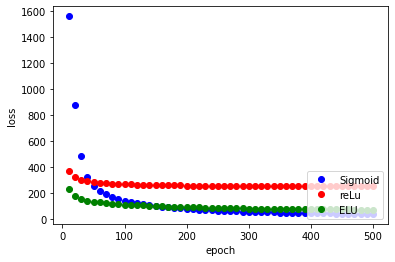

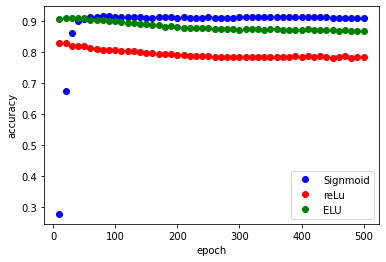

In [ ]:
import time
### CLASIFY MNIST PICTURES

# load the MNIST data
mnistData = mnist.load_data()

# The datapoints are in mnistData[0][0]
X = mnistData[0][0][:5000].reshape([5000,28*28])
X = X/225.0

# The labels are in mnistData[0][1]
Y = mnistData[0][1][:5000]

# randomly choose 75% of the data to be the training set and 25% for the testing set
(trainX, testX, trainY, testY) = train_test_split(X, Y, test_size = 0.25)

trainY = LabelBinarizer().fit_transform(trainY)
#testY = LabelBinarizer().fit_transform(testY)

# fit the model to the training data SIGMOID
print("**** SIGMOID ****")
start = time.time()
model = FeedforwardNeuralNetworkOptions([784, 16, 10], testY, testX, 0.01, "sigmoid")
model.fit(trainX,trainY,testY, testX, 500,10) 
end = time.time()
sigmoid_time = end-start

# fit the model to the training data reLu
print("**** RELU ****")
start = time.time()
model = FeedforwardNeuralNetworkOptions([784, 16, 10], testY, testX, 0.01, "reLu")
model.fit(trainX,trainY,testY, testX, 500,10)  
end = time.time()
reLu_time = end-start

# fit the model to the training data ELU
print("**** ELU ****")
start = time.time()
model = FeedforwardNeuralNetworkOptions([784, 16, 10], testY, testX, 0.01, "ELU")
model.fit(trainX,trainY,testY, testX, 500,10)   
end = time.time()
elu_time = end-start

# create plot of epoch vs loss
plot1 = plt.figure(1)
plt.plot(list(plot_data_sig.keys()), list(plot_data_sig.values()), 'bo', label= "Sigmoid")
plt.plot(list(plot_data_re.keys()), list(plot_data_re.values()), 'ro', label = "reLu")
plt.plot(list(plot_data_elu.keys()), list(plot_data_elu.values()), 'go', label="ELU")

plt.legend(loc='lower right')
plt.ylabel("loss")
plt.xlabel("epoch")

# creat plot of epoch vs accuracy
plot2 = plt.figure(2)
plt.plot(list(plot_data2_sig.keys()), list(plot_data2_sig.values()), 'bo', label= "Signmoid")
plt.plot(list(plot_data2_re.keys()), list(plot_data2_re.values()), 'ro', label="reLu")
plt.plot(list(plot_data2_elu.keys()), list(plot_data2_elu.values()), 'go', label= "ELU")

plt.legend(loc='lower right')
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.show

print("\n****Total time elapsed")
print("\tSigmoid:", sigmoid_time, "\n\tReLu:\t", reLu_time, "\n\tELU:\t", elu_time)